> In Lesson 2 Markov Decision Process, you will learn:
    > - What is a MDP?
    > - How to represent MDP in code
    > - Application of MDP, especially in Reinforcement Learning

# What is a typical day for Meow like?
---
I sleep, eat, and find mouse, meow :)  
More specifically, you can treat me sleeping, eating, and finding mouse as 3 separate states.
So, we have:
- $S_{sleep}$
- $S_{eat}$
- $S_{find}$


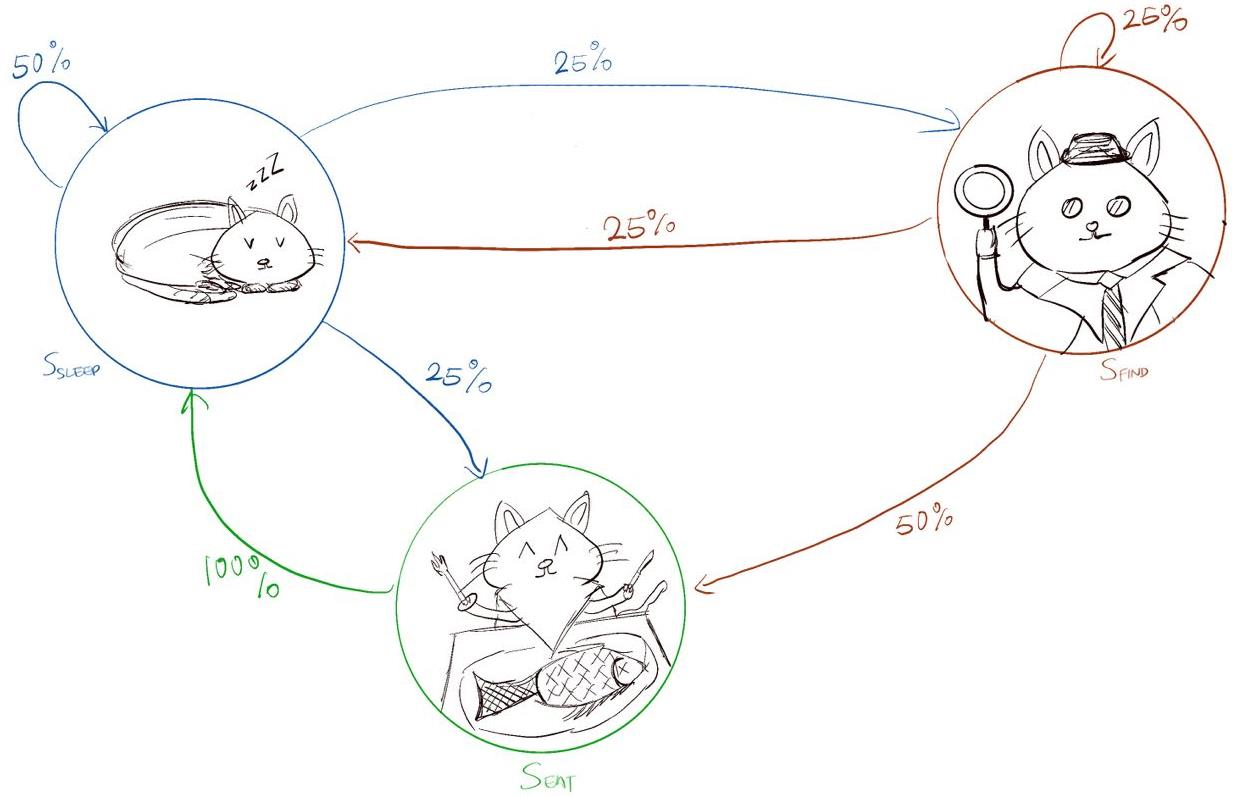

What did you see from the illustration above?

Do you see 3 **circles**?
  - Nice! Those are the 3 **states**.

And do you see the **lines** that connect the circle together?!
  - Those are associate with the **probability** that I will move across the states, a.k.a transition. (So that is why it is called **transition probability**)
  - **For example**: If I am currently sleeping (current state), I might do the next following (next state):
    1. Continue sleeping with **50%** chance
    2. Eating with **25%** chance
    3. Finding Mouse with **25%** chance

So you see that what I will be doing next depends on what I am doing now. And that, my friend, is the **Markov Property**. Aha!!!


# Now let us represent the transition probabilities in code!
---
"
**Quetsion 2.1**: fill in the number!

In [ ]:
P = {
    "Sleep": {"Sleep": 0.50 , "Find": 0.25, "Eat": #TODO},
    "Find" : {"Sleep": #TODO , "Find": 0.25, "Eat": 0.50},
    "Eat"  : {"Sleep": #TODO , "Find": 0.00, "Eat": 0.00}
}

P

# Let's talk about reward!

---

In a Markov Decision Process, one important ingredient is the **reward**. As you have learned in the previous lesson, reward is something that encourages/guides your agent to act in a specific way. See the picture below!

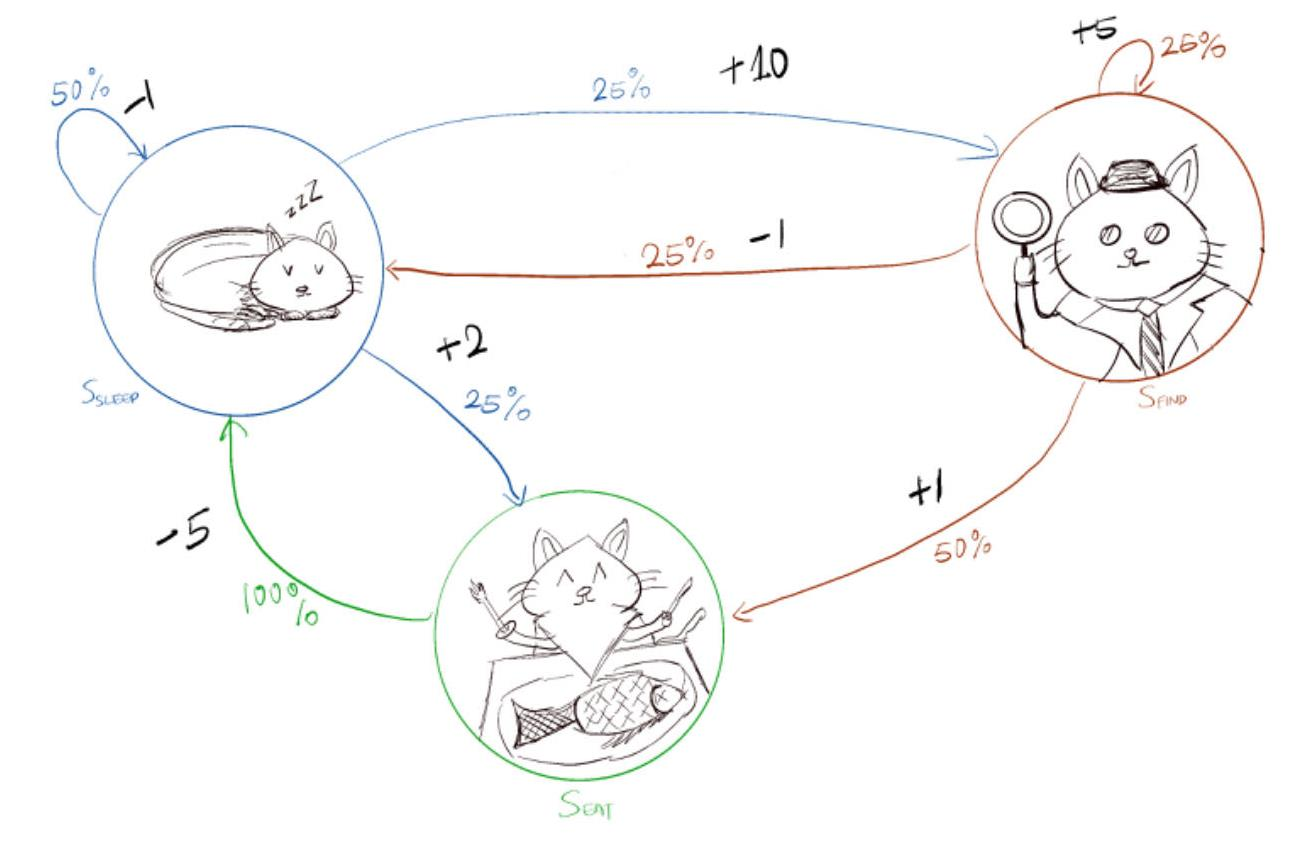

What do you see? Do you see that moving from one state to other have a specific amount of reward?

**Question 2.2** : Now, let's fill in the rewards below.

In [ ]:
R = {
    "Sleep": {"Sleep": -1 , "Find": 10, "Eat": #TODO},
    "Find" : {"Sleep": #TODO , "Find": 5, "Eat":1},
    "Eat"  : {"Sleep": #TODO , "Find": 0, "Eat": 0}
}

R

# Policy

---

A policy $\pi$ is the **brain** of the agent, Meow the Cat!

Let us define the following policy: I will **sleep** no matter which state I am in, so let's call this policy sleepy $\pi$

In [5]:
sleepy_pi = {
    "Sleep": {"Sleep": 1 , "Find": 0, "Eat": 0},
    "Find" : {"Sleep": 1 , "Find": 0, "Eat": 0},
    "Eat"  : {"Sleep": 1 , "Find": 0, "Eat": 0}
}

sleepy_pi

{'Sleep': {'Sleep': 1, 'Find': 0, 'Eat': 0},
 'Find': {'Sleep': 1, 'Find': 0, 'Eat': 0},
 'Eat': {'Sleep': 1, 'Find': 0, 'Eat': 0}}

# Expected Reward (as expected!)

---

This might involve some **probability theory**. To put in simply, given a state that I am currently in, the expected reward is trying to **averaging up** all the next possible states and the reward I will receive for that state!

In [9]:
def calculate_expected_reward(state, P, R, policy):
    expected_reward = 0.0
    for next_state in policy[state]:
        action_probability = policy[state][next_state]
        reward = R[state][next_state]
        expected_reward += action_probability * reward
    return expected_reward

# Let's calculate the expected reward for the "Sleep" state
print(calculate_expected_reward("Sleep", P, R, sleepy_pi))

-1.0


**Question 2.3**

Calculate the expected reward for the "Eat" state and "Find" state, and you will find the the **Sleepy** policy is not a policy that I want if I want the highest reward!

In [ ]:
# TODO

# Comparing policies

---

Here, I will run the policy for a certrain amount of steps look at the reward that I get!

In [18]:
import numpy as np
def calculate_total_expected_reward(start_state, P, R, policy, num_steps):
    current_state = start_state
    total_reward = 0.0
    for _ in range(num_steps):
        reward = calculate_expected_reward(current_state, P, R, policy)
        total_reward += reward
        # Assume transition to next state is deterministic based on policy
        next_states = list(policy[current_state].keys())
        next_state_probabilities = list(policy[current_state].values())
        current_state = np.random.choice(next_states, p=next_state_probabilities)
    return total_reward

In [21]:
calculate_total_expected_reward("Sleep", P, R, sleepy_pi, 100)

-100.0

**Question 2.4**: Propose a better policy that satisfies the following:

- total expected reward starting at every state: greater than 0
- every row should add up to 1 (ex. all the elements of "Sleep" add up to 1)

In [ ]:
new_pi = {
    "Sleep": {"Sleep": #TODO , "Find": #TODO, "Eat": #TODO},
    "Find" : {"Sleep": #TODO , "Find": #TODO, "Eat": #TODO},
    "Eat"  : {"Sleep": #TODO , "Find": #TODO, "Eat": #TODO}
}
print(calculate_total_expected_reward("Sleep", P, R, new_pi, 100))
print(calculate_total_expected_reward("Find", P, R, new_pi, 100))
print(calculate_total_expected_reward("Eat", P, R, new_pi, 100))

### Reference: 
1. [MDP Tutorial from GeeksForGeeks](https://www.geeksforgeeks.org/markov-decision-process/)